In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

In [2]:
# import make_moons from sklearn
x, y = sklearn.datasets.make_moons(200, noise = 0.20)

In [3]:
y

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1], dtype=int64)

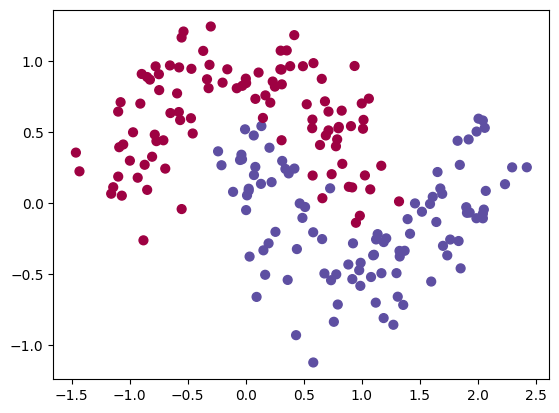

In [4]:
plt.scatter(x[:,0], x[:,1], s = 40, c = y, cmap = plt.cm.Spectral)
plt.show()

In [5]:
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

In [6]:
class FeedForward(nn.Module):
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super(FeedForward, self).__init__()
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        self.out = nn.Linear(hidden_neurons, output_neurons)

    def forward(self, x):
        x = self.hidden(x)
        x = F.relu(x)
        x = self.out(x)

        return x

In [7]:
network = FeedForward(input_neurons=2, hidden_neurons=50, output_neurons=2)

# optimizer
optimizer = torch.optim.SGD(network.parameters(), lr = 0.02)

# loss function
loss_function = nn.CrossEntropyLoss() # output_neurons is 2, if 1 use BCE 

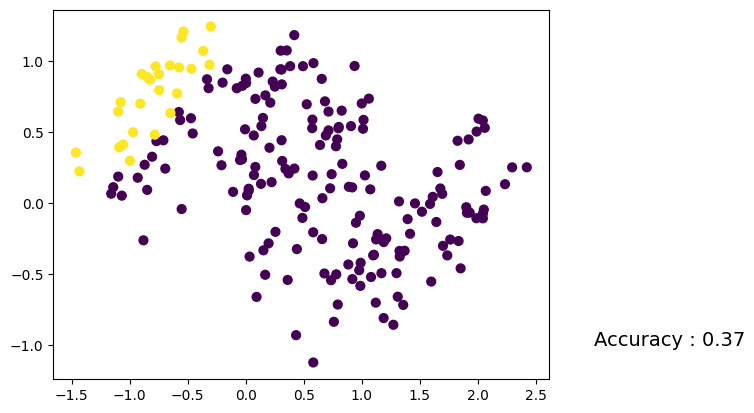

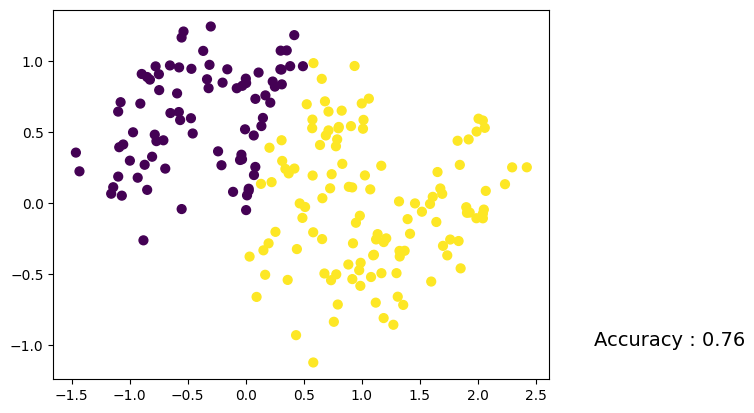

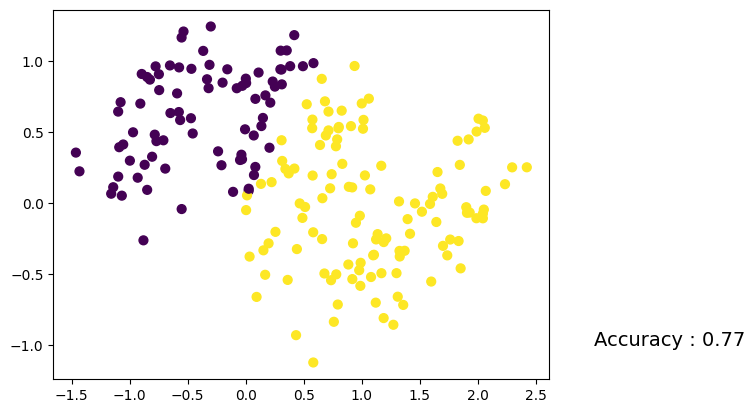

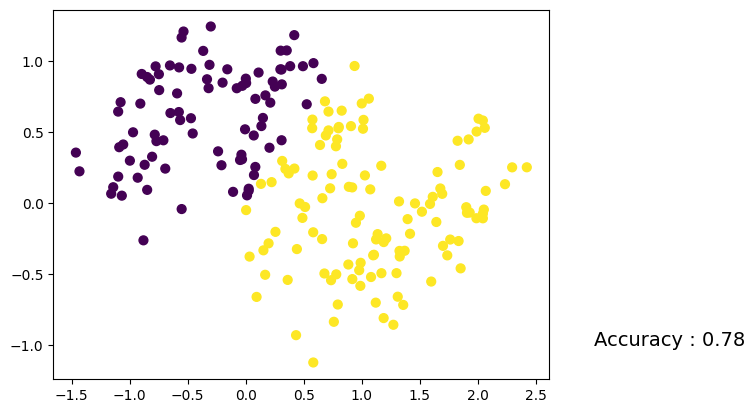

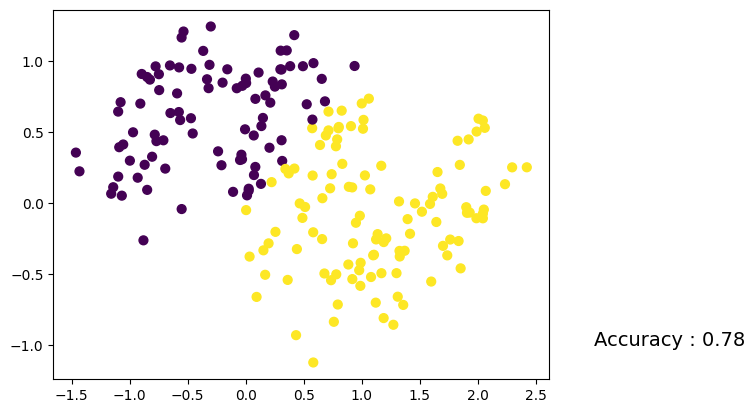

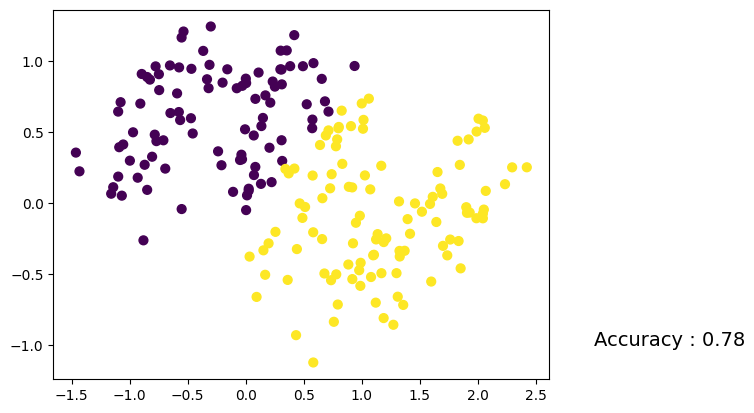

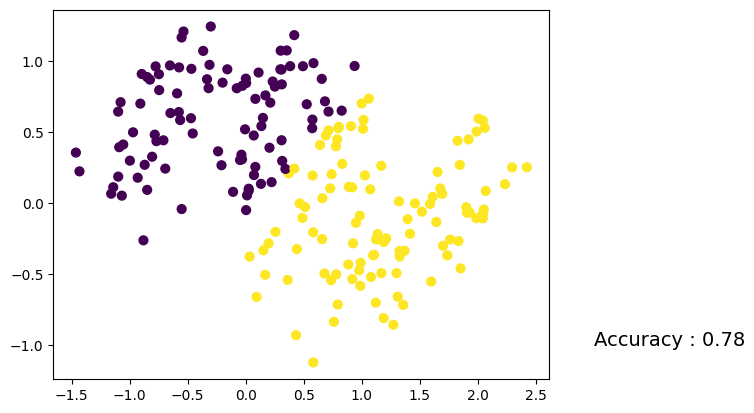

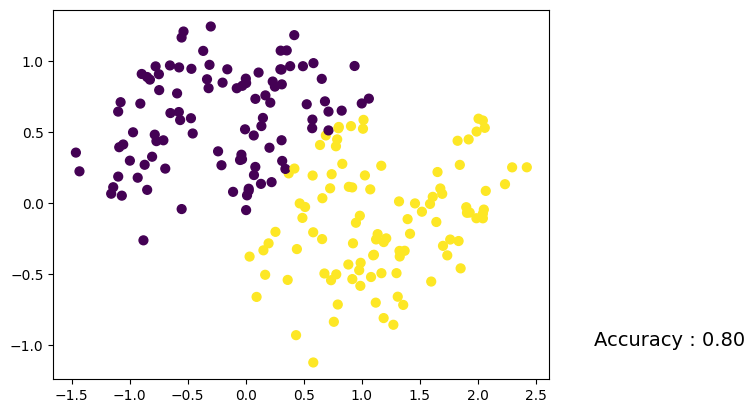

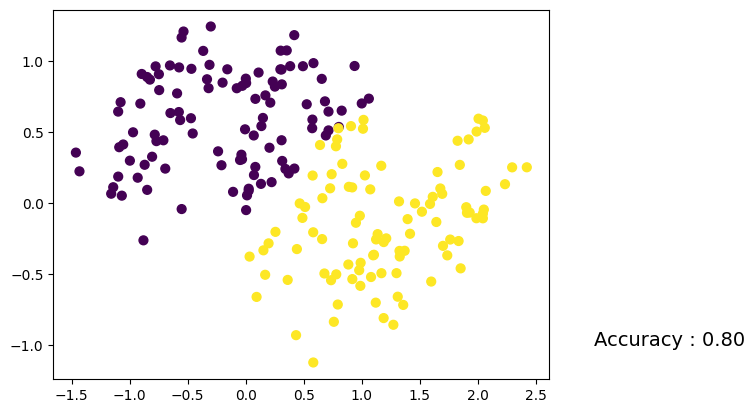

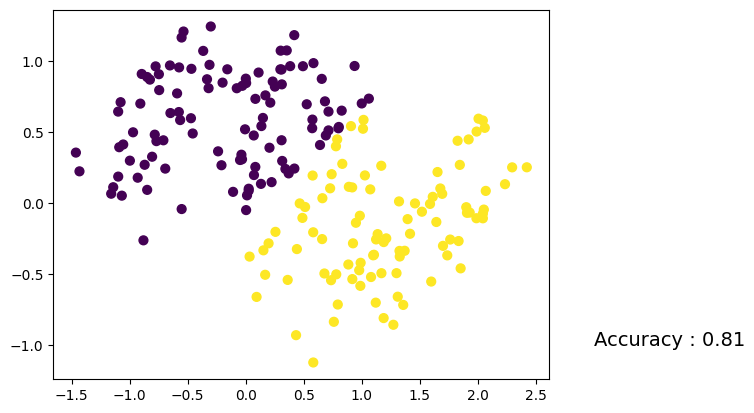

In [9]:
# training loop
plt.ion()  # interactive mode on
for epoch in range(100):
    # Forward
    out = network(x)
    # loss calculation
    loss = loss_function(out, y)
    # set gradients to zero
    optimizer.zero_grad()
    # backprop
    loss.backward()
    # update
    optimizer.step()

    if epoch % 10 == 0:
        # show learning process
        max_value, prediction = torch.max(out, 1)
        predicted_y = prediction.data.numpy()
        target_y = y.data.numpy()

        plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], s = 40, c = predicted_y)

        accuracy = (predicted_y == target_y).sum() / target_y.size

        plt.text(3, -1, "Accuracy : {:.2f}".format(accuracy), fontdict = {'size' : 14})
        plt.pause(0.1)

plt.ioff()  # interactive mode off
plt.show()